In [193]:
import skimage #scikit-learn image manipulation #
from skimage import io
from skimage import data
import matplotlib.pyplot as plt #plot utilities #
import numpy as np #numerical computations #
from mpl_toolkits import mplot3d

## Part 1: Computing and Analyzing the eigenspace

### This function load each object and calculate the biased image Data Matrix X

In [194]:
""" Let's load up some images, reshape them to "vectors", and construct the image data matrix X.
Recall, for this project you do not need to unbias the images, I would recommend just using X for 
everything instead of X_hat """
def LoadImage(Object, NumberImages = 128):
    Total_objects = ['Boat64','Cabinet64','Car64','Chair64','Cup64','Flashlight64','Handle64','HoseReel64','ibook0164',
                    'imac0464','imac9864','Keyboard64','LED64','Light164','Light264','Mug64','Scooter64','SprayBottle64',
                    'Stapler64','Trash64']
    n = NumberImages
    X = np.zeros((128**2,0))
    for i in range(n):
        Img = io.imread('TrainingImages/TrainingImages/'+str(Total_objects[Object])+'/UnProcessed/img_' + str(i) + '.png',
                        as_gray = True)
        Img = skimage.img_as_float32(Img).reshape(n**2,1)
        #Ivec = Img.reshape(128**2,1)
        X = np.hstack((X,Img))
    return X

### Computing the eigenvectors using Singular Value Decomposition

In [195]:
def SVD(DataMatrix):

    U,S,Vt = np.linalg.svd(DataMatrix,full_matrices=False)

    """  The "eigenimages"" are exactly the columns of U (they just need to be reshaped back to image format) """

    return U,S,Vt    

### Analyzing the singular value and Estimating K for O = 20 different objects

In [196]:
def Estimate_K(S, NumberImages = 128):

    SingularValue = S*S
    # Normalised [0,1]
    #b = (P - np.min(P))/np.ptp(P)
    #Normalizing the Singular Values
    n = NumberImages
    Normalized_S = SingularValue/sum(SingularValue)
    Total = 0
    for i in range(n):
        if Total <= 0.9:
            Total = sum (Normalized_S[0:i])
            k = i
    return k+1     
K_Eigenvectors = np.zeros((20,1))

for m in range(20):
    X = LoadImage(m, NumberImages = 128)
    [U,S,Vt] = SVD(X)
    K_Eigenvectors[m,:] = Estimate_K(S)
    
print('K_Eigenvectors',K_Eigenvectors)


K_Eigenvectors [[ 8.]
 [ 2.]
 [ 5.]
 [ 9.]
 [ 4.]
 [ 7.]
 [ 7.]
 [12.]
 [ 7.]
 [11.]
 [14.]
 [22.]
 [ 3.]
 [ 6.]
 [16.]
 [ 3.]
 [13.]
 [ 3.]
 [ 6.]
 [ 2.]]


### Constructing the local appearance manifold M_n, Here I show the eigenimages and Manifold for object 1 and 2 and 5. By changing the value of object in X, you can compute others

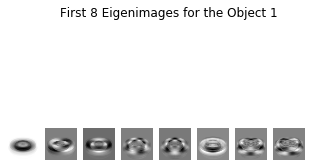

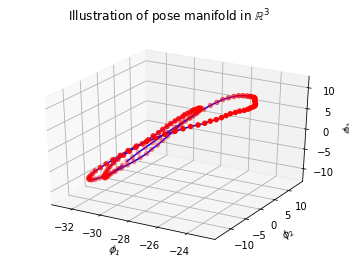

In [197]:
#for j in range(19):
X = LoadImage(0, NumberImages = 128)
[U,S,Vt] = SVD(X)
n = 128
fig = plt.figure(2)
fig.suptitle('First 8 Eigenimages for the Object 1')
for i in range(8):
    plt.subplot(1,9,i+1)
    plt.axis('off')
    plt.imshow(U[:,i].reshape(n,n),cmap='gray')


k = 3
def LocalManifold(k):
    
    M = U[:,0:k].T@X

    fig = plt.figure(3)
    fig.suptitle('Illustration of pose manifold in $\mathbb{R}^3$')
    ax = plt.axes(projection='3d')
    ax.plot3D(M[0,:], M[1,:], M[2,:],'blue')
    ax.scatter3D(M[0,:], M[1,:], M[2,:],color='red')
    ax.set_xlabel('$\phi_1$')
    ax.set_ylabel('$\phi_2$')
    ax.set_zlabel('$\phi_3$')
    return M
M = LocalManifold(k)

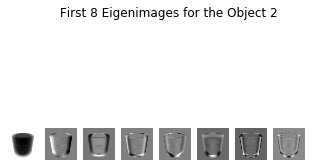

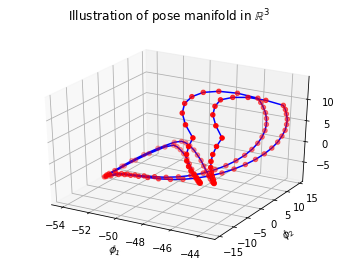

In [198]:
X = LoadImage(1, NumberImages = 128)
[U,S,Vt] = SVD(X)
n = 128
fig = plt.figure(4)
fig.suptitle('First 8 Eigenimages for the Object 2')
for i in range(8):
    plt.subplot(1,9,i+1)
    plt.axis('off')
    plt.imshow(U[:,i].reshape(n,n),cmap='gray')

k = 3
def LocalManifold(k=3):
    
    M = U[:,0:k].T@X

    fig = plt.figure(5)
    fig.suptitle('Illustration of pose manifold in $\mathbb{R}^3$')
    ax = plt.axes(projection='3d')
    ax.plot3D(M[0,:], M[1,:], M[2,:],'blue')
    ax.scatter3D(M[0,:], M[1,:], M[2,:], color='red')
    ax.set_xlabel('$\phi_1$')
    ax.set_ylabel('$\phi_2$')
    #ax.set_zlabel('$\phi_3$')
    return M
M = LocalManifold(k)    
    

### From the above figure of object 2, It is clear that some of the points are overlapping which make this difficult to ascertain its orientation from -dimentional subspace.

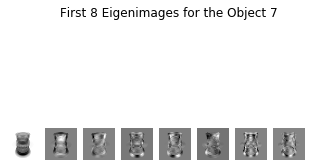

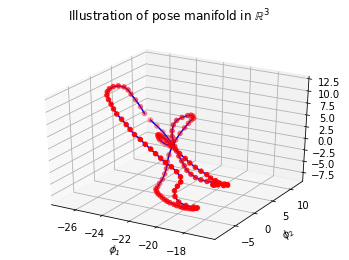

In [200]:
X = LoadImage(7, NumberImages = 128)
[U,S,Vt] = SVD(X)
n = 128
fig = plt.figure(4)
fig.suptitle('First 8 Eigenimages for the Object 7')
for i in range(8):
    plt.subplot(1,9,i+1)
    plt.axis('off')
    plt.imshow(U[:,i].reshape(n,n),cmap='gray')

k = 3

def LocalManifold(k=3):
    
    M = U[:,0:k].T@X

    fig = plt.figure(5)
    fig.suptitle('Illustration of pose manifold in $\mathbb{R}^3$')
    ax = plt.axes(projection='3d')
    ax.plot3D(M[0,:], M[1,:], M[2,:],'blue')
    ax.scatter3D(M[0,:], M[1,:], M[2,:], color='red')
    ax.set_xlabel('$\phi_1$')
    ax.set_ylabel('$\phi_2$')
    #ax.set_zlabel('$\phi_3$')
    return M
M = LocalManifold(k)        


### Computing the global manifold M_g by Concatenating all 2B images for each of the n objects into a matrix G and computing the eigenspace of this G. Also I display the result for the global manifold.

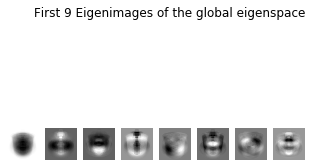

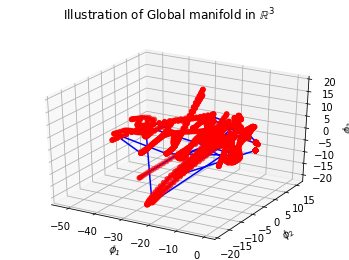

In [201]:
def GlobalMatrixG(NumberImages=128):

    Total_objects = ['Boat64','Cabinet64','Car64','Chair64','Cup64','Flashlight64','Handle64','HoseReel64','ibook0164',
                    'imac0464','imac9864','Keyboard64','LED64','Light164','Light264','Mug64','Scooter64','SprayBottle64',
                    'Stapler64','Trash64']
    NumberImages = 128
    n = NumberImages
    G = np.zeros((n**2,20*128))
    for j in range(19):
        for i in range(n):
            Img = io.imread('TrainingImages/TrainingImages/'+str(Total_objects[j])+'/UnProcessed/img_' + str(i) + '.png',
                        as_gray = True)
            Img = skimage.img_as_float32(Img).reshape(n**2,1)
            #Ivec = Img.reshape(128**2,1)
            a = j*128+i
            G[:,a] = Img.T
    return G        

G = GlobalMatrixG(128)
[U,S,Vt] = SVD(G)
k = Estimate_K(S, NumberImages = 2560)

n = 128
fig = plt.figure(2)
fig.suptitle('First 9 Eigenimages of the global eigenspace')
for i in range(8):
    plt.subplot(1,9,i+1)
    plt.axis('off')
    plt.imshow(U[:,i].reshape(n,n),cmap='gray')




               
def GlobalManifold(k=3):
    
    M_g = U[:,0:k].T@G

    fig = plt.figure(3)
    fig.suptitle('Illustration of Global manifold in $\mathbb{R}^3$')
    ax = plt.axes(projection='3d')
    ax.plot3D(M_g[0,:], M_g[1,:], M_g[2,:],'blue')
    ax.scatter3D(M_g[0,:], M_g[1,:], M_g[2,:],color='red')
    ax.set_xlabel('$\phi_1$')
    ax.set_ylabel('$\phi_2$')
    ax.set_zlabel('$\phi_3$')
    return M_g
M_g = GlobalManifold(3)               
               


## Part 2: Computing the appropriate subspace dimension

### In this part I develop a technique to quantify how many eigenimages are required by using the computational equation given in the project description (Equation 1).

In [202]:

X = LoadImage(0, NumberImages = 128)
[U,S,Vt] = SVD(X)

Desired_Energy = 0.9        
def ComputeEnergyRatio(Eigenimages, DataMatrix, Index):
    X = DataMatrix
    U = Eigenimages
    U1 = U[:,Index]
    U2 = np.transpose(U1)
    U_X = U2@X
    Norm_U_X = np.linalg.norm(U_X)
    Norm_X = np.linalg.norm(X,'fro')
    Ratio = (Norm_U_X/Norm_X)
    return Ratio

In [203]:
X = LoadImage(0, NumberImages = 128)
[U,S,Vt] = SVD(X)

def ComputeEergyRatio(X,U,k):
    Ratio = 0
    for j in range(k+1):
        Uk = U[:,0:j]
        Norm_U_X = 0
        for i in range(j):
            a = Uk[:,i].T@X
            Norm_U_X += (np.linalg.norm(a))**2
        Norm_X = (np.linalg.norm(X,'fro'))**2
    Ratio += Norm_U_X/Norm_X
    return Ratio

def ComputeER(DesiredEnergy,X,U):
    Ratio = 0
    k = 1
    while Ratio < DesiredEnergy:
        k += 1
        Ratio = ComputeEergyRatio(X,U,k)
    return k, Ratio
#k, Ratio = ComputeER(0.95,X,U)
#print(k)

In [204]:
table = np.zeros((20,3))
obj = ['Boat64','Cabinet64','Car64','Chair64','Cup64','Flashlight64','Handle64','HoseReel64','ibook0164',
                    'imac0464','imac9864','Keyboard64','LED64','Light164','Light264','Mug64','Scooter64','SprayBottle64',
                    'Stapler64','Trash64']
DesiredEnergy = ([0.8, 0.9, 0.95])

for i in range(20):
    X = LoadImage(i, NumberImages = 128)
    [U,S,Vt] = SVD(X)
    for j in range(3):
        #Ratio = ComputeEergyRatio(X,U,k)
        k, Ratio = ComputeER(DesiredEnergy[j],X,U)
        table[(i,j)] = k
print(table)        

[[ 3.  7. 12.]
 [ 2.  2.  3.]
 [ 3.  4. 10.]
 [ 4.  8. 16.]
 [ 2.  3.  5.]
 [ 3.  6. 12.]
 [ 4.  6. 10.]
 [ 5. 11. 19.]
 [ 3.  6. 13.]
 [ 4. 10. 17.]
 [ 5. 13. 23.]
 [12. 21. 31.]
 [ 2.  2.  3.]
 [ 2.  5. 12.]
 [ 9. 15. 26.]
 [ 2.  2.  4.]
 [ 6. 12. 22.]
 [ 2.  2.  5.]
 [ 3.  5. 11.]
 [ 2.  2.  2.]]


### Displaying the table with each object listed and the required subspace dimension for 80, 90 and 95% energy.

In [205]:
from IPython.display import HTML,display

obj = np.array(['Boat64','Cabinet64','Car64','Chair64','Cup64','Flashlight64','Handle64','HoseReel64','ibook0164',
                    'imac0464','imac9864','Keyboard64','LED64','Light164','Light264','Mug64','Scooter64','SprayBottle64',
                    'Stapler64','Trash64'])
t = table.tolist()
d = []
per = ['Object\EnergyPercent', '80%', '90%', '95%']
d.append(per)
for i in range(20):
    v = [obj[i],t[i][0],t[i][1],t[i][2]]
    d.append(v)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in d)
   )
))





Object\EnergyPercent,80%,90%,95%
Boat64,3.0,7.0,12.0
Cabinet64,2.0,2.0,3.0
Car64,3.0,4.0,10.0
Chair64,4.0,8.0,16.0
Cup64,2.0,3.0,5.0
Flashlight64,3.0,6.0,12.0
Handle64,4.0,6.0,10.0
HoseReel64,5.0,11.0,19.0
ibook0164,3.0,6.0,13.0
imac0464,4.0,10.0,17.0


### Displaying the energy recovery ration as a function of subspace dimension

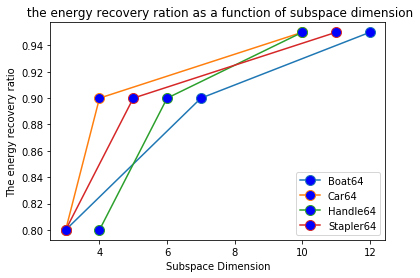

In [206]:
# object 1 points 
x1 = [3,7,12] 
y1 = [0.8,0.9,0.95] 
# plotting the line 1 points  
plt.plot(x1, y1, label = "Boat64", marker='o', markerfacecolor='blue', markersize=10) 
  
# object 3 points 
x2 = [3,4,10] 
y2 = [0.8,0.9,0.95] 
# plotting the line 2 points  
plt.plot(x2, y2, label = "Car64", marker='o', markerfacecolor='blue', markersize=10) 


# object 7 points 
x3 = [4,6,10] 
y3 = [0.8,0.9,0.95] 
# plotting the line 2 points  
plt.plot(x3, y3, label = "Handle64", marker='o', markerfacecolor='blue', markersize=10)


# object 19 points 
x4 = [3,5,11] 
y4 = [0.8,0.9,0.95] 
# plotting the line 2 points  
plt.plot(x4, y4, label = "Stapler64", marker='o', markerfacecolor='blue', markersize=10)


# setting x and y axis range 
#plt.ylim(0.8,1) 
#plt.xlim(1,13) 


# naming the x axis 
plt.xlabel('Subspace Dimension') 
# naming the y axis 
plt.ylabel('The energy recovery ratio') 
# giving a title to my graph 
plt.title(' the energy recovery ration as a function of subspace dimension') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

## Object Classification (pose estimation and object recognition)

### In this part I wil develop a system to classify the objects from each of the test image and return the output with entered object name, Its orientation and displaying side by side test image and closest matching image from the training set.

### To implement the classification function I used test object, training object and orientation of test image. Also this function can take desired energy as its input. I find the error between global manifold of all objects and test manifold of the test object. this function match the traing image with test image where it finds the minimum error. And I also calculate the pose of the closest image in degree.

In [207]:
G = GlobalMatrixG(128)
[U,S,Vt] = SVD(G)


def ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8):
    D_E = DesiredEnergy
    Image_test= Test_Image_Index
    Object_test = Test_Object_index
    
    k, Ratio = ComputeER(D_E,G,U)
    Manifold_global = U[:,0:k-1].T@G
    n = 128
    # Loading the test image and reshape the image to a vector form
    obj = np.array(['Boat32','Cabinet32','Car32','Chair32','Cup32','Flashlight32','Handle32','HoseReel32','ibook0132',
                    'imac0432','imac9832','Keyboard32','LED32','Light132','Light232','Mug32','Scooter32','SprayBottle32',
                    'Stapler32','Trash32'])
    object_name = obj[Object_test]
    
    test_image = io.imread('TestImages/TestImages/'+str(obj[Object_test])+'/UnProcessed/img_' + str(Image_test) + '.png',
                        as_gray = True)
    
    Reshaped_test_image = skimage.img_as_float32(test_image).reshape(128**2,1)
    Manifold_test = U[:,0:k-1].T@Reshaped_test_image
    Error = np.zeros(2560)
    Min_error = 500
    
    # Here I calculate the error between global manifold and selected test image manifold. and select the image from the
    # the global manifold of training images.
    for i in range(2560):
        e = np.linalg.norm(Manifold_global[:,i] - Manifold_test.T)
        Error[i] = e
        if e < Min_error:
            Min_error = e
            Selected_index_image = i
    
    
    obj_train = np.array(['Boat64','Cabinet64','Car64','Chair64','Cup64','Flashlight64','Handle64','HoseReel64','ibook0164',
                    'imac0464','imac9864','Keyboard64','LED64','Light164','Light264','Mug64','Scooter64','SprayBottle64',
                    'Stapler64','Trash64'])
    
    
    # After the selection of matched training image, the object which is belongs to that particular training image is
    #selected
    i = int(Selected_index_image % n) 
    Object_For_Selected_Image = int((Selected_index_image - i)/128)
    Matched_image = io.imread('TrainingImages/TrainingImages/'+str(obj_train[Object_For_Selected_Image])+'/UnProcessed/img_' + str(i) + '.png',
                        as_gray = True)
    
    Training_object_name = obj_train[Object_For_Selected_Image]
    
    # reading the RandAng.txt file
    with open('TestImages/TestImages/RandAng.txt', 'r') as f:
        Orientation = [[float(num) for num in line.split(',')] for line in f]
    Orientation = np.array(Orientation)
    Data_pose = np.squeeze(Orientation)
    #radian angle of the selected test image
    Test_image_rad = Data_pose[Image_test]
    estimation = (2*np.pi*i)/128
    Actual_rad = Test_image_rad
    Error_rad = estimation - Actual_rad
    Degree_error = abs((180/np.pi)*Error_rad)
    
    Ori = Orientation.T
    Image_orientation = Ori[Image_test]
    
    return test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name

### I am here showing some test objects, their name and orientation and the closest matching test image in training set by using the function ObjectClass

Name of the Test object: imac9832
Orientation: [4.4687]
Name of the Training object: imac9864


Text(0.5, 1.0, 'Matched image')

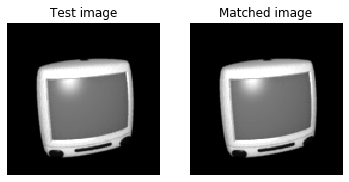

In [208]:
# Selection of the test image for user
Test_Image_Index = 31
#Selection of the object of test image
Test_Object_index = 10
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)

print("Name of the Test object:", object_name)
print("Orientation:", Image_orientation)
print("Name of the Training object:", Training_object_name)
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.imshow(test_image,cmap = 'gray')
ax1.axis('off')
ax2.imshow(Matched_image,cmap = 'gray')
ax2.axis('off')
ax1.set_title("Test image")
ax2.set_title("Matched image")

Name of the Test object: Car32
Orientation: [3.635]
Name of the Training object: Car64


Text(0.5, 1.0, 'Matched image')

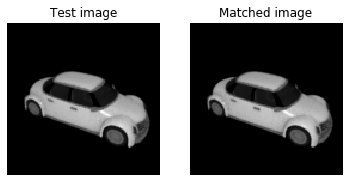

In [209]:
# Selection of the test image for user
Test_Image_Index = 45
#Selection of the object of test image
Test_Object_index = 2
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)

print("Name of the Test object:", object_name)
print("Orientation:", Image_orientation)
print("Name of the Training object:", Training_object_name)
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.imshow(test_image,cmap = 'gray')
ax1.axis('off')
ax2.imshow(Matched_image,cmap = 'gray')
ax2.axis('off')
ax1.set_title("Test image")
ax2.set_title("Matched image")

Name of the Test object: Flashlight32
Orientation: [3.2744]
Name of the Training object: Flashlight64


Text(0.5, 1.0, 'Matched image')

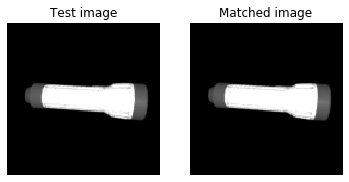

In [210]:
# Selection of the test image for user
Test_Image_Index = 50
#Selection of the object of test image
Test_Object_index = 5
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)

print("Name of the Test object:", object_name)
print("Orientation:", Image_orientation)
print("Name of the Training object:", Training_object_name)
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
ax1.imshow(test_image,cmap = 'gray')
ax1.axis('off')
ax2.imshow(Matched_image,cmap = 'gray')
ax2.axis('off')
ax1.set_title("Test image")
ax2.set_title("Matched image")

## Analyzing the result of my system for all test images of each object

### Here I am showing the error of matching the training image with test images which are shown above to evalute how accurate my classification result

In [211]:
# Selection of the test image for user
Test_Image_Index = 31
#Selection of the object of test image
Test_Object_index = 10
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)
print("The error in degree for imac9832:", Degree_error)

The error in degree for imac9832: 0.10014991011098714


In [212]:
# Selection of the test image for user
Test_Image_Index = 45
#Selection of the object of test image
Test_Object_index = 2
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)
print("The error in degree for Car32:", Degree_error)

The error in degree for Car32: 0.14515853005422594


In [215]:
# Selection of the test image for user
Test_Image_Index = 50
#Selection of the object of test image
Test_Object_index = 5
test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(Test_Image_Index, Test_Object_index, DesiredEnergy = 0.8)
print("The error in degree for Flashlight32:", Degree_error)

The error in degree for Flashlight32: 0.8281995623632393


### Now, I am calculating the Average error for all test images for each object with different energy ration. However, due to the limitation of my laptop I couldn't select some higher energy ratio because of computational complexities. 

In [216]:
def AverageError(Test_Object_index, DesiredEnergy):
    Total_error = 0
    for i in range(32):
        test_image, Matched_image, Degree_error, object_name, Image_orientation, Training_object_name = ObjectClass(i, Test_Object_index, DesiredEnergy)
        Total_error += Degree_error
    Avg_error = Total_error/32
    percentage_error = (Avg_error*100)/360
    return percentage_error



In [217]:
Test_Object_index = 5
DesiredEnergy = 0.7

P_E = AverageError(Test_Object_index, DesiredEnergy)
print("Average Error in percent for object cup32 with 70% energy recovery ratio", P_E)

Average Error in percent for object cup32 with 70% energy recovery ratio 1.1490105196320968


In [218]:
Test_Object_index = 5
DesiredEnergy = 0.8

P_E = AverageError(Test_Object_index, DesiredEnergy)
print("Average Error in percent for object cup32 with 80% energy recovery ratio", P_E)


Average Error in percent for object cup32 with 80% energy recovery ratio 0.16821020192281969


### From the above experiment it is clearly shown that Error decreases with the increases of energy recovery ratio. I used 80% energy ratio for recognition and found the perfect result. Obvisouly, If we increase the energy ratio(Which will eventually increase the subspace dimension) then the error will reduce significantly. From My analysis, I can conclude that 80% energy recovery ration is sufficient for accurate classification.